In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
# set the font size
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)

In [5]:
# import extra packages to make sure the code is applicable to both Python2/3
from __future__ import print_function

import future                                                                                                                      
import builtins                                                                                                                    
import past                                                                                                                        
import six

### Section 1.1 - Importing the Data

Let's begin in the same way we did for Assignment \#2 of 2014, but this time let's start with importing the temperature data:

In [8]:
temperatureDateConverter = lambda d : dt.datetime.strptime(d.decode('utf-8'),\
                                                           '%Y-%m-%d %H:%M:%S')
temperature = np.genfromtxt('../../data/temperature.csv',delimiter=",",\
            dtype=[('timestamp', type(dt.datetime.now)),('tempF', 'f8')],\
            converters={0: temperatureDateConverter}, skip_header=1)

Notice that, because we are asking for the data to be interpreted as having different types for each column, and the the numpy.ndarray can only handle homoegenous types (i.e., all the elements of the array must be of the same type) then the resulting array is a one dimensional ndarray of tuples. Each tuple corresponds to a row in the file and in it, then, are the three columns for the row.

Formally, this is called a Structured Array and is something you should read up on if you want to fully understand what it means and how to handle these types of data structures:

https://docs.scipy.org/doc/numpy/user/basics.rec.html

In [9]:
print("The variable 'temperature' is a " + str(type(temperature)) +\
      " and it has the following shape: " + str(temperature.shape))

The variable 'temperature' is a <type 'numpy.ndarray'> and it has the following shape: (105409,)


Fortunately, these structured arrays allow us to access the content inside the tuples directly by calling the field names. Let's figure out what those field names are:

In [10]:
temperature.dtype.fields

<dictproxy {'tempF': (dtype('float64'), 8), 'timestamp': (dtype('O'), 0)}>

Now let's see what the timestamps look like, for this dataset:

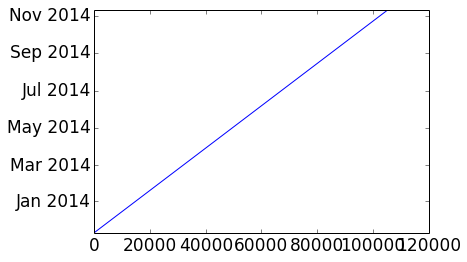

In [11]:
plt.plot(temperature['timestamp'])

Seems as if there are no gaps, but let's make sure about that. First, let's compute the minimum and maximum difference between any two consecutive timestamps:

In [12]:
print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(temperature['timestamp']))) )
print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(temperature['timestamp']))) )     

The minimum difference between any two consecutive timestamps is: 0:05:00
The maximum difference between any two consecutive timestamps is: 0:05:00


Given that they both are 5 minutes, then it means that there really is no gap in the datset, and all temperature measurements were taken 5 minutes apart.

Since we need temperature readings every 15 minutes we can downsample this dataset. There are many ways to do the downsampling, and it is important to understand the effects each of them may have on the final result we are seeking. However, this is beyond the scope of the class, so I will pick a very naïve approach and simply select every third sample:

In [13]:
temperature = temperature[0:-1:3]

Finally, let's make a note of when the first and last timestamp are:

In [14]:
print("First timestamp is on \t{}. \nLast timestamp is on \t{}.".format(\
            temperature['timestamp'][0], temperature['timestamp'][-1]))

First timestamp is on 	2013-11-10 05:00:00. 
Last timestamp is on 	2014-11-11 04:45:00.


#### Loading the Power Data

Just as we did before, we start with the genfromtxt function:

In [15]:
dateConverter = lambda d : dt.datetime.strptime(d.decode('utf-8'),\
                                                '%Y/%m/%d %H:%M:%S')
power = np.genfromtxt('../../data/campusDemand.csv',delimiter=",",\
        names=True,dtype=['S255',dt.datetime,'f8'],converters={1: dateConverter})

Let's figure out how many meters there are, and where they are in the ndarray, as well as how many datapoints they have.

In [16]:
name, indices, counts  = np.unique(power['Point_name'], return_index=True,return_counts=True)

Now let's print that information in a more readable fashion:

In [17]:
for i in range(len(name)):
    print(str(name[i])+"\n\t from "+str(power[indices[i]]['Time'])+\
          " to "+str(power[indices[i]+counts[i]-1]['Time'])+"\n\t or "+\
          str(power[indices[i]+counts[i]-1]['Time']-power[indices[i]]['Time']))
    

Baker Hall Electric (Shark 29) - Demand Watts 
	 from 2014-02-12 07:03:27 to 2014-11-10 22:04:28
	 or 271 days, 15:01:01
Baker Hall Electric (Shark 29) - Watts
	 from 2014-11-03 00:00:24 to 2014-11-10 22:43:28
	 or 7 days, 22:43:04
Doherty Apts Electric (Shark 11) - Demand Watts
	 from 2014-10-10 09:13:56 to 2014-11-10 21:52:28
	 or 31 days, 12:38:32
Electric kW Calculations - Main Campus kW
	 from 2013-11-10 00:00:30 to 2014-11-10 22:53:27
	 or 365 days, 22:52:57
Porter Hall Electric (Shark 30) - Watts
	 from 2014-09-10 00:00:50 to 2014-11-10 22:42:28
	 or 61 days, 22:41:38
Scaife Hall Electric (Shark 21) - Watts
	 from 2014-10-10 00:00:15 to 2014-11-10 22:45:28
	 or 31 days, 22:45:13
University Center Electric (Shark 34) - Watts
	 from 2014-11-03 00:00:24 to 2014-11-10 22:48:28
	 or 7 days, 22:48:04


Since only one meter needs to be used, pick the one you like and discard the rest. The reason to choose name[3] is that it contains the data with longest duration and have a good overlapping with temperature data.

In [18]:
power=power[power['Point_name']==name[3]]

Let's make sure the data is sorted by time and then let's plot it

In [19]:
#You can also do 
'''power = np.sort(power,order='Time')'''
# which is the same thing if you have enough RAM(>4GB)
time_ix = sorted(range(len(power)), key=lambda x: power[x]['Time'])
power = power[time_ix]

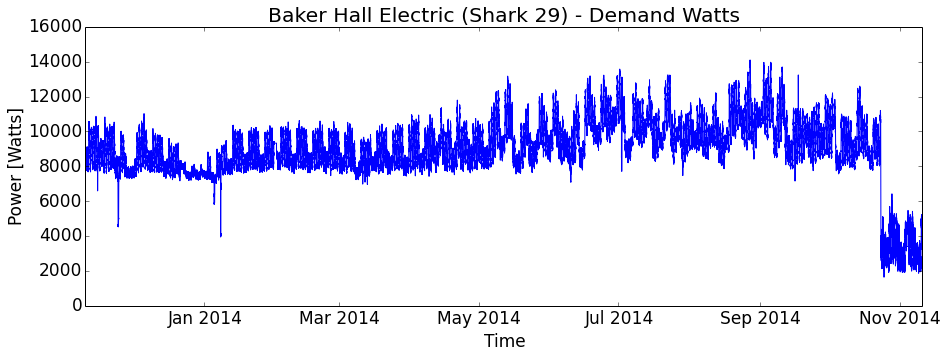

In [20]:
fig1= plt.figure(figsize=(15,5))
plt.plot(power['Time'],power['Value'])
plt.title(name[0])
plt.xlabel('Time')
plt.ylabel('Power [Watts]')

Are there gaps in this dataset?

In [21]:
print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(power['Time']))) )
print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(power['Time']))) )   

The minimum difference between any two consecutive timestamps is: 0:00:00
The maximum difference between any two consecutive timestamps is: 1 day, 2:50:49


And when is the first and last timestamp for this dataset? (We would like them to overlap as much as possible):

In [22]:
print("First timestamp is on \t{}. \nLast timestamp is on \t{}.".\
      format(power['Time'][0], power['Time'][-1]))

First timestamp is on 	2013-11-10 00:00:30. 
Last timestamp is on 	2014-11-10 22:53:27.


So let's summarize the differences in terms of the timestamps:

* There is at least one significant gap (1 day and a few hours), and there's also a strange situation that causes two consecutive samples to have the same timestamp (i.e., the minimum difference is zero).

* The temperature dataset starts a little later, and ends almost a full day later than the power dataset.

Yes, this is incovnenient, I know. It is painful to know that not only are the two datasets sampled at different rates, but they are also of different lengths of time and one of them has gaps. 

This is what real data looks like, in case you were wondering.

At this point, one of the simplest ways to move forward without having to re-invent the wheel would be to rely on the help of more powerful libraries such as **Pandas**. 

However, just to make things more fun and instructional, I am going to go through the trouble of implementing a interpolation function myself and will use it to obtain power values at exactly the same timestamps as the temperature data is providing.

In other words, let's assume that the timestamps for the temperature data are $t^T_i$ $\forall i \in [1, 2, \ldots n_T]$, and that the timestamps for the power data are $t^P_i$ $\forall i \in [1, 2, \ldots n_P]$, where $n_T$ and $n_P$ are the number of records in the temperature and power datasets, respectively. What I am interested in doing is finding the values of power $P$ at exactly all of the $n_T$ temperature timestamps, i.e. find $P(t^T_i)$ $\forall i$.

We will do all of these things in the next section.

### Harmonizing the time series

First let's remember what times the two time series (power and temperature) start and end:

In [23]:
print("Power data from {0} to {1}.\nTemperature data from {2} to {3}"\
      .format(power['Time'][0], power['Time'][-1], \
        temperature['timestamp'][0], temperature['timestamp'][-1]))

Power data from 2013-11-10 00:00:30 to 2014-11-10 22:53:27.
Temperature data from 2013-11-10 05:00:00 to 2014-11-11 04:45:00


Clearly, we don't need the portion of the temperature data that is collected beyond the dates that we have power data. Let's remove this (note that the magic number 24 corresponds to 360 minutes or 6 hours):

In [24]:
temperature = temperature[0:-24] 

Now let's create the interpolation function:

In [25]:
def power_interp(tP, P, tT):
    # This function assumes that the input is an numpy.ndarray of datetime objects

    # Most useful interpolation tools don't work well with datetime objects
    # so we convert all datetime objects into the number of seconds elapsed
    # since 1/1/1970 at midnight (also called the UNIX Epoch, or POSIX time):
    
    toposix = lambda d: (d - dt.datetime(1970,1,1,0,0,0)).total_seconds()
    tP = list(map(toposix, tP))
    tT = list(map(toposix, tT))
    
    # Now we interpolate
    from scipy.interpolate import interp1d
    f = interp1d(tP, P,'linear')
    
    return f(tT)
    

And let's use that funciton to get a copy of the interpolated power values, extracted at exactly the same timestamps as the temperature dataset:

In [26]:
newPowerValues = power_interp(power['Time'], power['Value'], temperature['timestamp'])

Finally, to keep things simple, let's restate the variables that matter:

In [27]:
toposix = lambda d: (d - dt.datetime(1970,1,1,0,0,0)).total_seconds()

timestamp_in_seconds = map(toposix,temperature['timestamp'])
timestamps = temperature['timestamp']
temp_values = temperature['tempF']
power_values = newPowerValues

And let's plot it to see what it looks like.

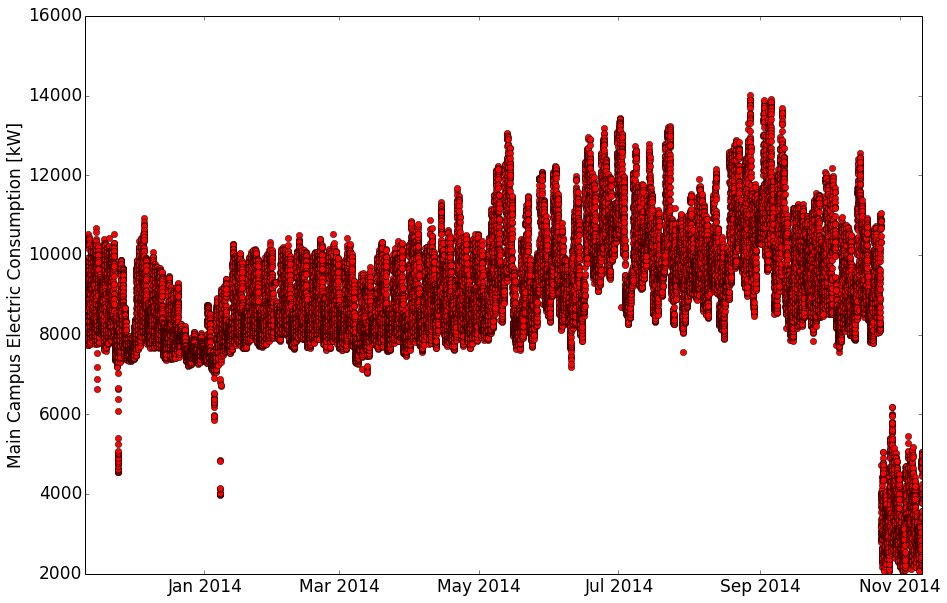

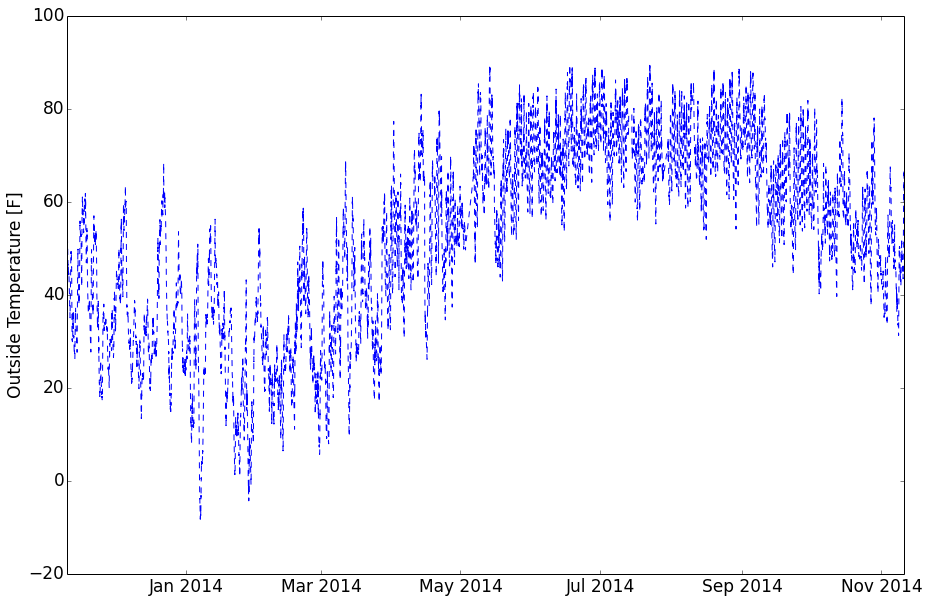

In [28]:
plt.figure(figsize=(15,10))
plt.plot(timestamps,power_values,'ro')
plt.ylabel('Main Campus Electric Consumption [kW]')
plt.figure(figsize=(15,10))
plt.plot(timestamps, temp_values, '--b')
plt.ylabel('Outside Temperature [F]')

## Task \#1 [20%]

Now let's put all of this data into a single structured array.

In [29]:
data = np.vstack((timestamps,power_values,temp_values)).T

In [35]:
data.shape

(35112, 3)

## Task \#2 [10%]

Since we have the timestamps in '*datetime*' format we can easily do the extraction of the indeces:

In [36]:
weekday = list(map(lambda t: t.weekday(), timestamps))
## Note that depending on how you do this, the result could be a tuple of ndarrays.
weekends = np.where(np.array(weekday) >= 5) 
weekdays = np.where(np.array(weekday) < 5)

Did we do this correctly?

In [37]:
## This is assuming you have a tuple of ndarrays
len(weekday) == len(weekends[0]) + len(weekdays[0]) 

True

Seems like we did.

## Task \#3 [10%]

Similar as in the previous task...

In [38]:
hour = list(map(lambda t: t.hour, timestamps))
# we consider 8am to 6pm in weekdays as occupied and others as unoccupied
occupied = np.where(np.all([np.array(hour) >= 7,np.array(hour) < 18,\
                            np.array(weekday) < 5],axis=0))
unoccupied = np.where(np.any([np.array(hour) < 7,np.array(hour) >= 18,\
                              np.array(weekday) >= 5],axis=0))


In [39]:
len(hour) == len(occupied[0]) + len(unoccupied[0])

True

However, a better way to decide the occupied hours is to look at the data, let's plot it by hour

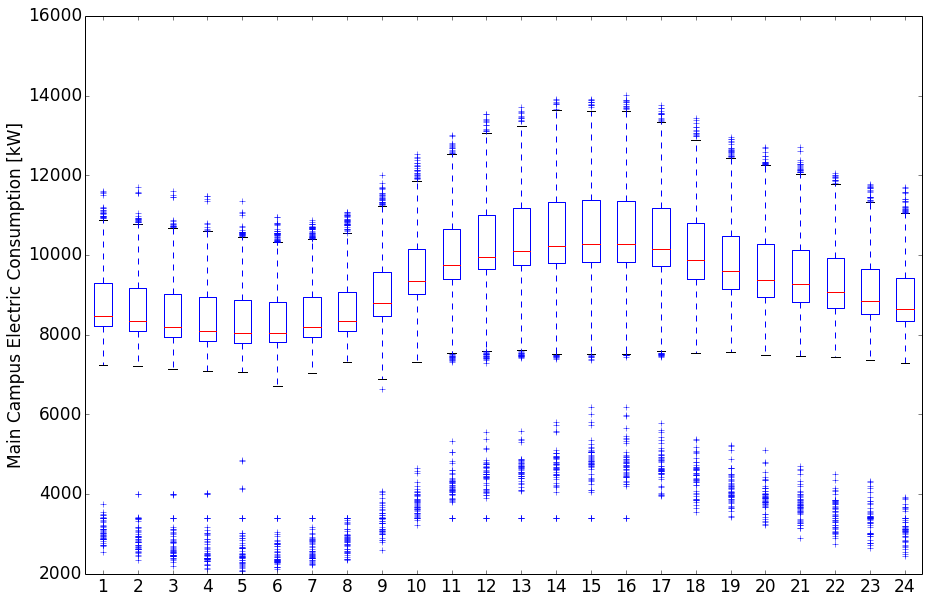

In [40]:
data_weekdays = data[weekdays]
plt.figure(figsize=(15,10))
plt.boxplot([[data_weekdays[np.where(np.array([t.hour for t in data_weekdays[:,0]]\
                                             )==i)[0],1]] for i in range(24)])
plt.ylabel('Main Campus Electric Consumption [kW]')

It seems a better choice is to pick 9am-11pm.

In [41]:
hour = list(map(lambda t: t.hour, timestamps))
# we consider 9am to 11pm in weekdays as occupied and others as unoccupied
occupied = np.where(np.all([np.array(hour) >= 8,np.array(hour) < 23,\
                            np.array(weekday) < 5],axis=0))
unoccupied = np.where(np.any([np.array(hour) < 8,np.array(hour) >= 23,\
                              np.array(weekday) >= 5],axis=0))

## Task \#4 [5%]

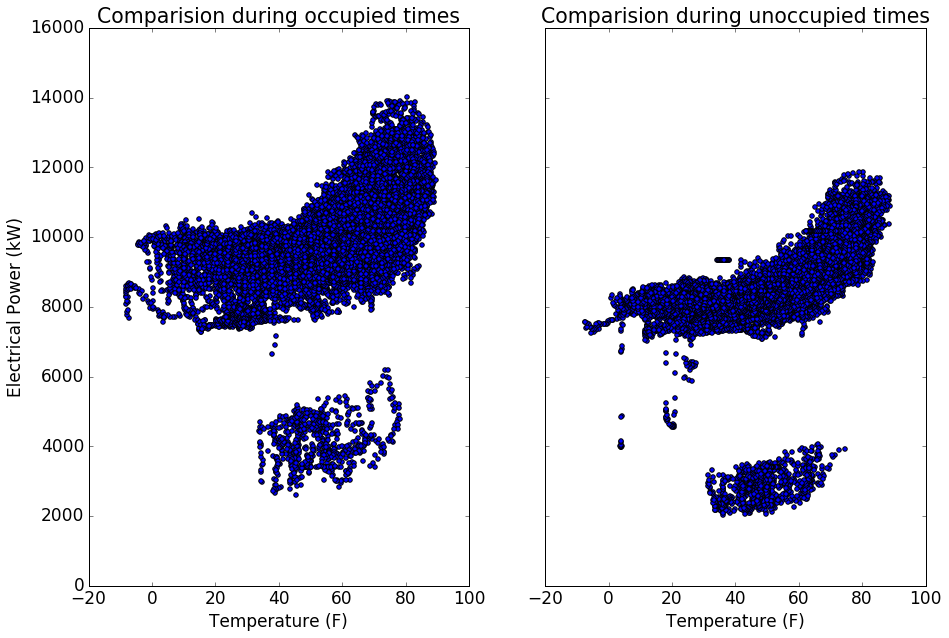

In [33]:
# plt.figure()
f, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(15,10))
ax1.scatter(data[occupied[0],2],data[occupied[0],1])
ax1.set_title('Comparision during occupied times')
ax1.set_ylabel('Electrical Power (kW)')
ax1.set_xlabel('Temperature (F)')
ax2.scatter(data[unoccupied[0],2],data[unoccupied[0],1])
ax2.set_title('Comparision during unoccupied times')
# ax1.set_ylabel('Electrical Power (kW)')
ax2.set_xlabel('Temperature (F)')

There seems to be weak piecewise linear correlation between power consumption and temperature. Also, the consumption during unoccpuied hours is lower than occupied hours. Some power values have smaller number compared with the others, which can acutally be seen in the previous plot showing the total power consumption in November.

## Task #5 [15%]

Let's calculate the temperature components, by creating a function that does just that:

In [34]:
def Tc(temperature, T_bound):
    # The return value will be a matrix with as many rows as the temperature
    # array, and as many columns as len(T_bound) [assuming that 0 is the first boundary]
    
    Tc_matrix = np.zeros((len(temperature), len(T_bound)+1))
    
    for (i,t) in enumerate(temperature):
        # first chunk
        if t <= T_bound[0]:
            Tc_matrix[i,0] = t
            continue
        else:
            Tc_matrix[i,0] = T_bound[0]
       
        # chunks in the middle
        n = 1
        while(n < len(T_bound)-1 and t > T_bound[n]):
            Tc_matrix[i,n] = T_bound[n+1] - T_bound[n]
            n += 1
        if(n < len(T_bound) and t <= T_bound[n]):
            Tc_matrix[i,n] = t - T_bound[n-1]
            continue
        
        # last chunk
        if(t > T_bound[-1]):
            if(len(T_bound)>1):
                Tc_matrix[i,-2] = T_bound[-1] - T_bound[-2]
            Tc_matrix[i,-1] = t - T_bound[-1]
    
    return Tc_matrix

In [35]:
# test
temp = [-12,18,32,47,98,100]
tb=[50]
Tc(temp,tb)

array([[-12.,   0.],
       [ 18.,   0.],
       [ 32.,   0.],
       [ 47.,   0.],
       [ 50.,  48.],
       [ 50.,  50.]])

## Task #6 [15%]

In [36]:
def DesignMatrix(temperature, T_bound, dim):
    
    # dim represents how many data points you want to count as one sample
    # in the case of the paper, dim=480
    m = len(temperature)
    # check if the input is valid
    if np.mod(m,dim) != 0:
        print('Invalid dimension, the number of points is %d but the dimension is %d.'\
             % (m,dim))
        print('The number of points should be integer multiple of the dimension size.')
        print('Please try again with vlaid arguments.')
        return
    num_sample = m//dim
    num_chunks = len(T_bound) + 1
    
    DM = np.zeros((len(temperature) , 1 + dim + num_chunks))
    
    # first column ones representing intercept
    DM[:,0] = np.ones(m)
    # repeat identify matrix of dim
    DM[:,1:-num_chunks] = np.vstack([np.eye(dim)] * num_sample)
    # append Tc at end
    DM[:,-num_chunks:] = Tc(temperature, T_bound)
    
    return DM

In [37]:
# test
temp = [-12,18,32,47,98,100]
tb = [40,50]
dim = 3
DesignMatrix(temp,tb,dim)

array([[  1.,   1.,   0.,   0., -12.,   0.,   0.],
       [  1.,   0.,   1.,   0.,  18.,   0.,   0.],
       [  1.,   0.,   0.,   1.,  32.,   0.,   0.],
       [  1.,   1.,   0.,   0.,  40.,   7.,   0.],
       [  1.,   0.,   1.,   0.,  40.,  10.,  48.],
       [  1.,   0.,   0.,   1.,  40.,  10.,  50.]])

## Task #7 [15%]

In [38]:
def beta_hat(X, power_values):
    # check rank of X to see if it's valid
#     from numpy.linalg import matrix_rank
    mr = np.linalg.matrix_rank(X)
    min_dim = min(X.shape)
    if mr < min_dim:
        print('Singular Matrix Warning: matrix rank %d but the minimum dimension %d'\
             % (mr, min_dim))
    # use formula to calculate beta, instead of using inverse, we use pseudo inverse
    return np.linalg.pinv(np.dot(X.T,X)).dot(X.T).dot(power_values)

In [39]:
# test
temp = [-12,18,32,47,98,100]
tb=[50]
dim = 3
power_test = data[:6,2]
beta_test=beta_hat(DesignMatrix(temp,tb,dim), power_test)
print('beta coefficient')
print(beta_test)
print('true power')
print(power_test)
print('predicted power')
print(DesignMatrix(temp,tb,dim).dot(beta_test))

Singular Matrix Warning: matrix rank 5 but the minimum dimension 6
beta coefficient
[40.926549287031975 13.506887394885005 13.77571996128489 13.643941930862052
 0.0022607610332447403 -0.014547296810276333]
true power
[54.43 54.648 54.734 54.516 54.212 53.865]
predicted power
[54.40630754951804 54.74296294691527 54.642835570957864 54.539692450479485
 54.11703705308584 53.95616442904245]


## Task #8 [2%]

Let's use data from weekdays first. However, by running the code, we noticed the performance is not very good, so we used only occupied data.

In [40]:
# the code to use weekdays Mon-Fri
# dim = 4*24*5 
# data_weekday = data[weekdays]

# the code to use occupied Mon-Fri, 8am-6pm
dim = 4*10*5 
data_weekday = data[occupied]

num_point = len(data_weekday)


print('Total points:%d, number of points per sample:%d'\
     % (num_point, dim))
truncated_point = num_point//dim * dim
print('To make sure we have integer samples,we need to runcated points to %d'\
     % truncated_point )
print('We have %d samples, each sample has %d points'\
     % (truncated_point/dim, dim))

Total points:15660, number of points per sample:200
To make sure we have integer samples,we need to runcated points to 15600
We have 78 samples, each sample has 200 points


Now, we have data from 52 weeks, and we use first 26 weeks to train and predict the rest 26 weeks.

In [41]:
data_weekday = data[:truncated_point]

trainData = data_weekday[:truncated_point//dim//2*dim]
testData = data_weekday[truncated_point//dim//2*dim:]

In [42]:
trainData.shape

(7800, 3)

## Task #9 [2%]

In [43]:
# get T_bound
num_chunk = 6

T_bound = np.linspace(min(data_weekday[:,2]),max(data_weekday[:,2]),num_chunk+1)[1:-1]

In [44]:
T_bound

array([  6.96366667,  22.19533333,  37.427     ,  52.65866667,  67.89033333])

## Task #10 [2%]

In [45]:
DM = DesignMatrix(trainData[:,2], T_bound, dim)

In [46]:
DM.shape

(7800, 207)

## Task #11 [2%]

In [47]:
beta_train = beta_hat(DM,trainData[:,1])

Singular Matrix Warning: matrix rank 206 but the minimum dimension 207


In [48]:
beta_train.shape

(207,)

## Task #12 [2%]

In [49]:
predicted = DesignMatrix(testData[:,2], T_bound, dim).dot(beta_train)

In [50]:
predicted.shape

(7800,)

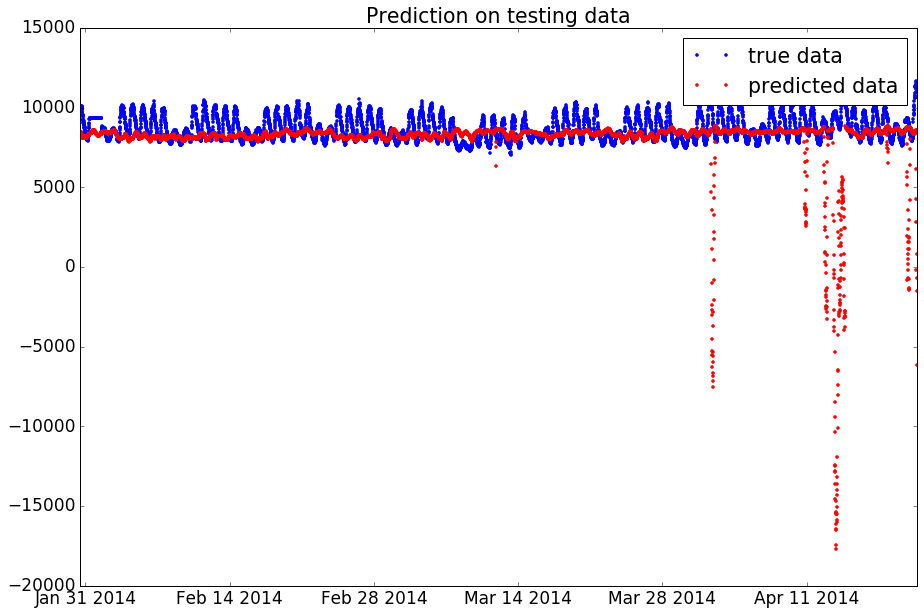

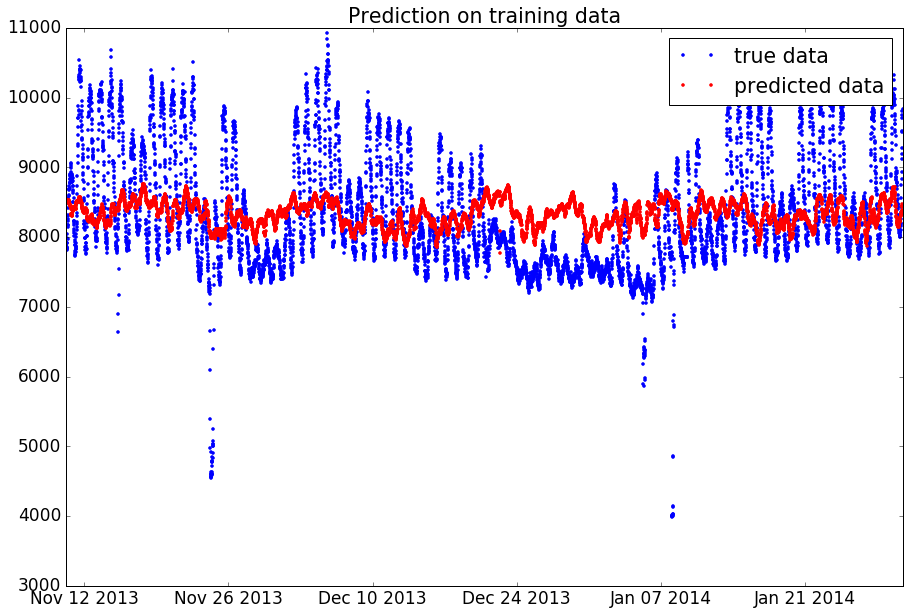

In [51]:
plt.figure(figsize=(15,10))
plt.plot(testData[:,0],testData[:,1],'.b')
plt.plot(testData[:,0],predicted,'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data')

plt.figure(figsize=(15,10))
plt.plot(trainData[:,0],trainData[:,1],'.b')
plt.plot(trainData[:,0],DesignMatrix(trainData[:,2], T_bound, dim).dot(beta_train),'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on training data')

The predicted value has a weekly pattern, however, the effect of temperature is so little. Let's increase the number of chunks for temperature and see how if performs.

Singular Matrix Warning: matrix rank 284 but the minimum dimension 301


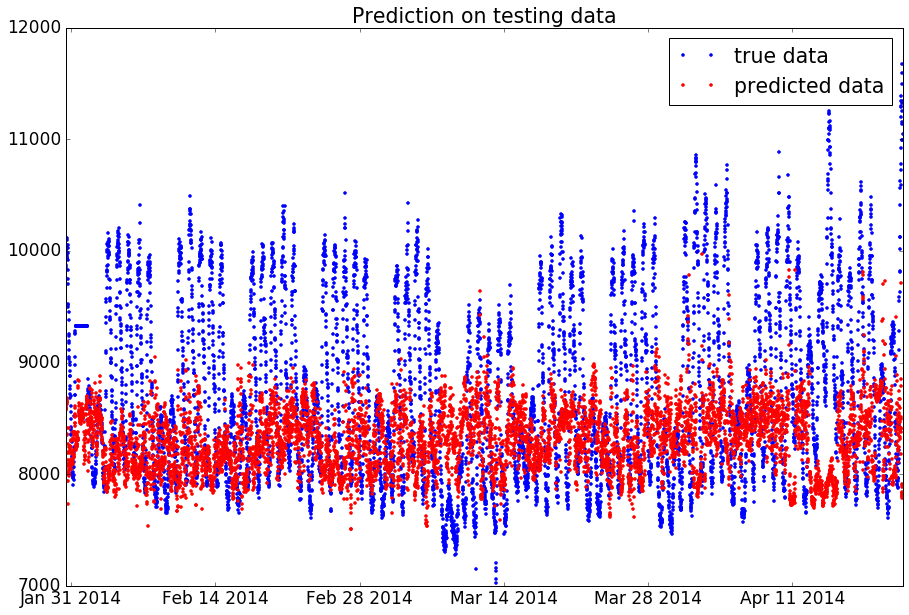

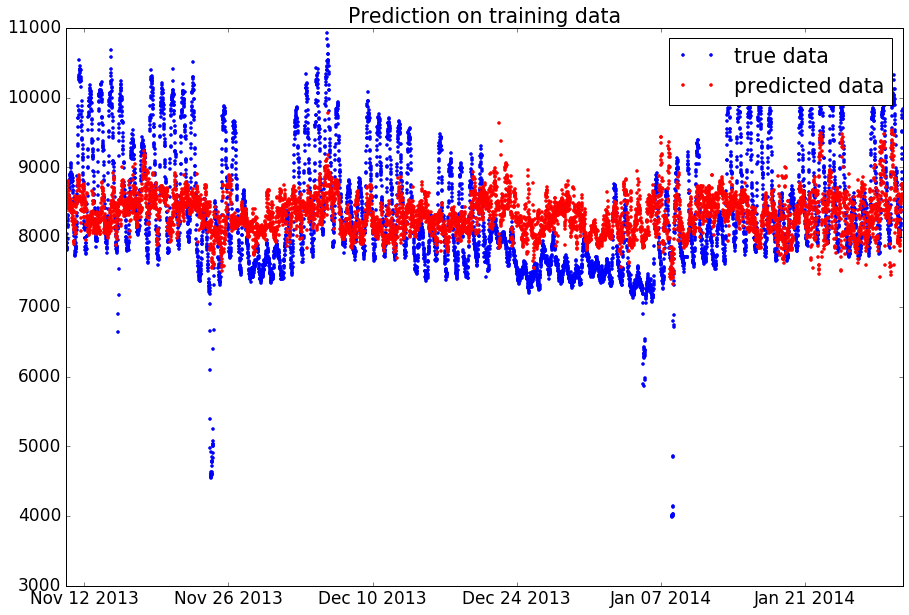

In [52]:
num_chunk = 100

T_bound = np.linspace(min(data_weekday[:,2]),max(data_weekday[:,2]),num_chunk+1)[1:-1]
beta_train = beta_hat(DesignMatrix(trainData[:,2], T_bound, dim),trainData[:,1])

plt.figure(figsize=(15,10))
plt.plot(testData[:,0],testData[:,1],'.b')
plt.plot(testData[:,0],DesignMatrix(testData[:,2], T_bound, dim).dot(beta_train),'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on testing data')

plt.figure(figsize=(15,10))
plt.plot(trainData[:,0],trainData[:,1],'.b')
plt.plot(trainData[:,0],DesignMatrix(trainData[:,2], T_bound, dim).dot(beta_train),'.r')
plt.legend(['true data','predicted data'])
plt.title('Prediction on training data')

As we can see now, we have a better prediction result.